In [2]:
import tensorflow as tf
from tensorflow.python import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import carregaDataset

# Predição Utilizando o Rede Neural Convencional do TensorFlow



# Foi efetudo três métodos para utilização de variáveis categóricas, no caso, a variável é um dia da semana

# **_Explicação de cada método:_**
> * ### ***dia_sequencia.***
  A lógica é apenas mudar o nome (string) do dia da semana para um valor, no caso, 1 para mon(segunda), 2 para tues(terça) ..., 5 para fri(sexta)
>
>
>Exemplo:
>
>
><table width="40px" border="1px">
        <tr border="1" height="60">
            <th width="80" style="text-align:center;">Dias Da Semana</th>
        </tr>
        <tr border="1" height="40">
            <td width="80" style="text-align:center;">1</td>
        </tr>
        <tr border="1" height="40">
        <td width="80" style="text-align:center;">2</td>
        </tr>
        <tr border="1" height="40">
            <td width="80" style="text-align:center;">3</td>
        </tr>
        <tr border="1" height="40">
            <td width="80" style="text-align:center;">4</td>
        </tr>
        <tr border="1" height="40">
            <td width="80" style="text-align:center;">5</td>
        </tr>
</table>

> * ### ***dia_seno_cosseno***
  Foram criado duas colunas e eliminado a coluna da string do dia da semana, as colunas criadas são: seno e cosseno, como são 5 dias da semana, pegamos o angulo total do circulo (360º) e dividimos por 5 (5  dias da semana), resultando 72º, ou seja, será 72 graus para cada dia da semana,assim sendo, mutiplicamos o valor do dia por 72 e depois aplicamos a formula de seno e cosseno
> 
>Exemplo:
> 
>
><table width="90%" border="1px" >
    <tr border="1" height="60">
    <th width="80" style="text-align:center;">DIA</th>
    <th width="80" style="text-align:center;">SENO</th>
    <th width="80" style="text-align:center;">COSSENO</th>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Segunda</td>
    <td width="80" style="text-align:center;">seno(1*72)</td>
    <td width="80" style="text-align:center;">cosseno(1*72)</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Terça</td>
    <td width="80" style="text-align:center;">seno(2*72º)</td>
    <td width="80" style="text-align:center;">cosseno(2*72º)</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Quarta</td>
    <td width="80" style="text-align:center;">seno(3*72º)</td>
    <td width="80" style="text-align:center;">cosseno(3*72º)</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Quinta</td>
    <td width="80" style="text-align:center;">seno(4*72º)</td>
    <td width="80" style="text-align:center;">cosseno(4*72º)</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Sexta</td>
    <td width="80" style="text-align:center;">seno(5*72º)</td>
    <td width="80" style="text-align:center;">cosseno(5*72º)</td>
    </tr>
</table>

>   
> * ### ***dia_get_dummies***
> Processo de codificação one-hot, para criar colunas de cada dia da semana e acescentando 
valor de 1 para a coluna do respectivo dia e zero para as demais.
>
> Exemplo:
>
>
><table width="90%" border="1px" >
    <tr border="1" height="60">
    <th width="80" style="text-align:center;">SEGUNDA</th>
    <th width="80" style="text-align:center;">TERÇA</th>
    <th width="80" style="text-align:center;">QUARTA</th>
    <th width="80" style="text-align:center;">QUINTA</th>
    <th width="80" style="text-align:center;">SEXTA</th>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">1</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">1</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">1</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">1</td>
    <td width="80" style="text-align:center;">0</td>
    </tr>
    <tr border="1"height="40">
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">1</td>
    </tr>
</table>

## Método responsável para a separação dos dias sequencias para testes, no caso a variável L_lag é a determinação de quantos dias de atraso serão criados para os dados sequenciais.

>Exemplo:
>
>L_lag = 5, será 5 dias de dados de entrada
>
><table width="90%" height="70"border="1px" >
    <tr border="1">
    <th width="80" style="text-align:center;">Vt-5</th>
    <th width="80" style="text-align:center;">Vt-4</th>
    <th width="80" style="text-align:center;">Vt-3</th>
    <th width="80" style="text-align:center;">Vt-2</th>
    <th width="80" style="text-align:center;">Vt-1</th>
    <th width="80" style="text-align:center;">Vt</th>
    </tr>
    <tr border="1">
    <td width="80" style="text-align:center;">0.084</td>
    <td width="80" style="text-align:center;">0.043</td>
    <td width="80" style="text-align:center;">-0.15</td>
    <td width="80" style="text-align:center;">-0.53</td>
    <td width="80" style="text-align:center;">+0.05</td>
    <td width="80" style="text-align:center;">+0.32</td>
    </tr>
</table>

<br>

# Utilizando o tensorflow, com o modo sequential, no qual atribui uma sequencia de camadas para o modelo.

<br>

In [3]:
def Sequential():    
    modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='tanh', use_bias=False),
    tf.keras.layers.Dense(1, use_bias=False)
    ])

#    modelo.compile(loss='mean_squared_error', optimizer='Adam',
#                    metrics=[tf.keras.metrics.MeanSquaredError()])
    modelo.compile(loss='mean_squared_error', 
                   optimizer=tf.keras.optimizers.Adam(
                       learning_rate=0.001,
                       use_ema=True,
                       ema_momentum=0.905,
                       ema_overwrite_frequency=4,
                       beta_1=0.95),                       
                    metrics=[tf.keras.metrics.MeanSquaredError()])   
 
    return modelo

In [4]:
#path = '/content/drive/MyDrive/Colab Notebooks/callbackDenseModel.h5'
#
#alpha = 1e-5
#
#checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=path,
#                                                monitor='loss',
#                                                verbose=1,
#                                                save_best_only=True,
#                                                mode='min',
#                                                )
#
#reducePL = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
#                                               factor=0.001, 
#                                               min_delta=alpha, 
#                                               patience=2, 
#                                               verbose=1)

# Sequências de Treinamentos com atualização do valor de beta, para a coluna **log_volatility**



In [5]:
df = carregaDataset.UpdateBeta(0.85)
x_train, y_train, x_test, y_test = carregaDataset.nysedf(df, 5)

modelo = Sequential()

modelo.fit(x_train, y_train, batch_size=20, epochs=100, verbose=1)
#modelo.fit(x_train, y_train, batch_size=40, epochs=400, verbose=1, callbacks=[checkpoint , reducePL])

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.1392 - mean_squared_error: 0.1392
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0240 - mean_squared_error: 0.0240
E

214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 75/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 76/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 77/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 78/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 79/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 80/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 81/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 82/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch

134/134 [==============================] - 0s 825us/step
R² Test =  0.40944594387858035
R² Train=  0.5715913512462927


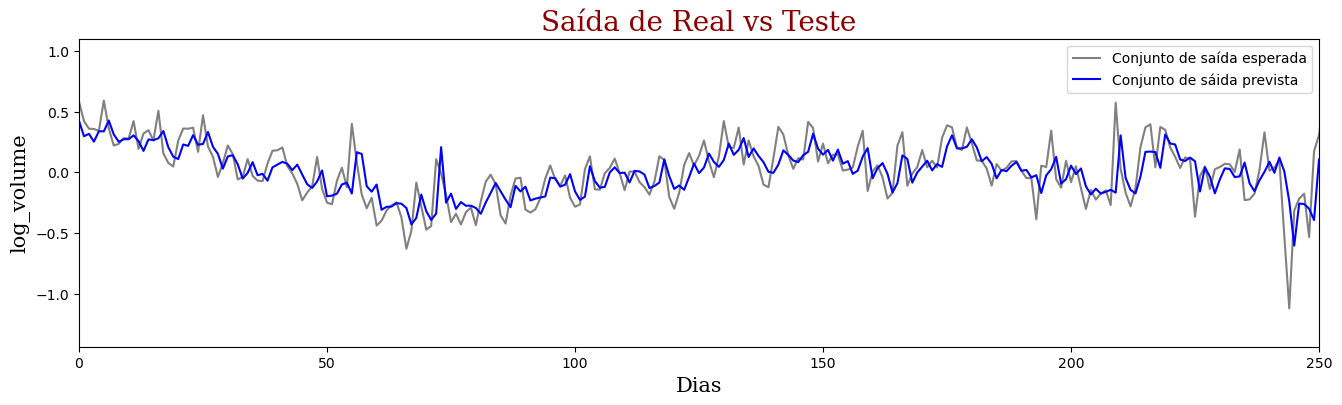

In [6]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final = pd.DataFrame()
df_Final['Beta=0.85'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)

In [7]:
df = carregaDataset.UpdateBeta(0.90)
x_train, y_train, x_test, y_test = carregaDataset.nysedf(df, 5)

modelo = Sequential()

modelo.fit(x_train, y_train, batch_size=20, epochs=100, verbose=1)
#modelo.fit(x_train, y_train, batch_size=40, epochs=400, verbose=1, callbacks=[checkpoint , reducePL])

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.3853 - mean_squared_error: 0.3853
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0251 - mean_squared_error: 0.0251
E

214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 75/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 76/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 77/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 78/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 79/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 80/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 81/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 82/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0231 - mean_squared_error: 0.0231
Epoch

134/134 [==============================] - 0s 962us/step
R² Test =  0.4100715455082561
R² Train=  0.5711509600985119


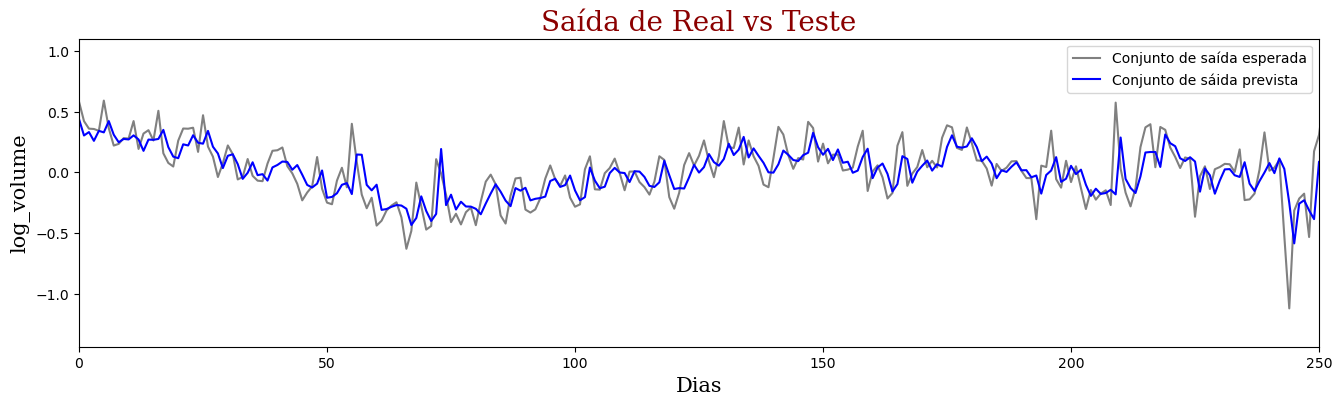

In [8]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final['Beta=0.90'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)

In [9]:
df = carregaDataset.UpdateBeta(0.95)
x_train, y_train, x_test, y_test = carregaDataset.nysedf(df, 5)

modelo = Sequential()

modelo.fit(x_train, y_train, batch_size=20, epochs=100, verbose=1)
#modelo.fit(x_train, y_train, batch_size=40, epochs=400, verbose=1, callbacks=[checkpoint , reducePL])

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.7521 - mean_squared_error: 0.7521
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0259 - mean_squared_error: 0.0259
E

214/214 [==============================] - 0s 1ms/step - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 75/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 76/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 77/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 78/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 79/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 80/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 81/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 82/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch

134/134 [==============================] - 0s 817us/step
R² Test =  0.40601117446565815
R² Train=  0.5650076133336103


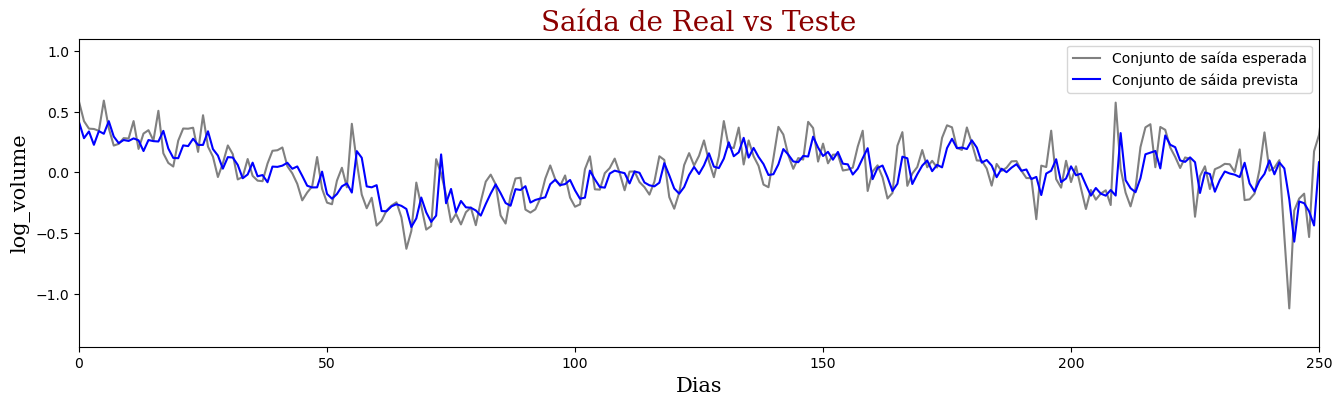

,Vt-5,Vt-4,Vt-3,Vt-2,Vt-1,Rt-5,Rt-4,Rt-3,Rt-2,Rt-1,Zt-5,Zt-4,Zt-3,Zt-2,Zt-1
0,0.044187,0.210182,0.525306,0.346202,0.032573,0.000568,-0.003462,0.003845,0.007813,-0.004461,-12.112541,-12.064190,-12.122712,-12.217619,-13.127403
1,0.133246,0.044187,0.210182,0.525306,0.346202,-0.010824,0.000568,-0.003462,0.003845,0.007813,-11.410941,-12.112541,-12.064190,-12.122712,-12.217619
2,-0.011528,0.133246,0.044187,0.210182,0.525306,0.000124,-0.010824,0.000568,-0.003462,0.003845,-11.462161,-11.410941,-12.112541,-12.064190,-12.122712
3,0.001607,-0.011528,0.133246,0.044187,0.210182,0.003358,0.000124,-0.010824,0.000568,-0.003462,-11.458577,-11.462161,-11.410941,-12.112541,-12.064190
4,-0.106437,0.001607,-0.011528,0.133246,0.044187,-0.003296,0.003358,0.000124,-0.010824,0.000568,-11.457133,-11.458577,-11.462161,-11.410941,-12.112541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,-0.001507,0.108579,0.144112,0.183537,0.199621,-0.005267,0.005267,0.000310,-0.007093,0.002216,-9.904624,-9.881496,-9.857716,-9.806514,-9.801957
4272,-0.631830,-0.001507,0.108579,0.144112,0.183537,0.000298,-0.005267,0.005267,0.000310,-0.007093,-9.955823,-9.904624,-9.881496,-9.857716,-9.806514
4273,-0.365829,-0.631830,-0.001507,0.108579,0.144112,-0.001216,0.000298,-0.005267,0.005267,0.000310,-10.005478,-9.955823,-9.904624,-9.881496,-9.857716
4274,-0.137014,-0.365829,-0.631830,-0.001507,0.108579,0.002336,-0.001216,0.000298,-0.005267,0.005267,-10.050430,-10.005478,-9.955823,-9.904624,-9.881496


In [10]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final['Beta=0.95'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)
x_train

# Normalizando os dados da log_volatility, exemplo do histograma de sem normalização (cor laranja) e normalizado (cor azul), padrão para média no ponto zero.

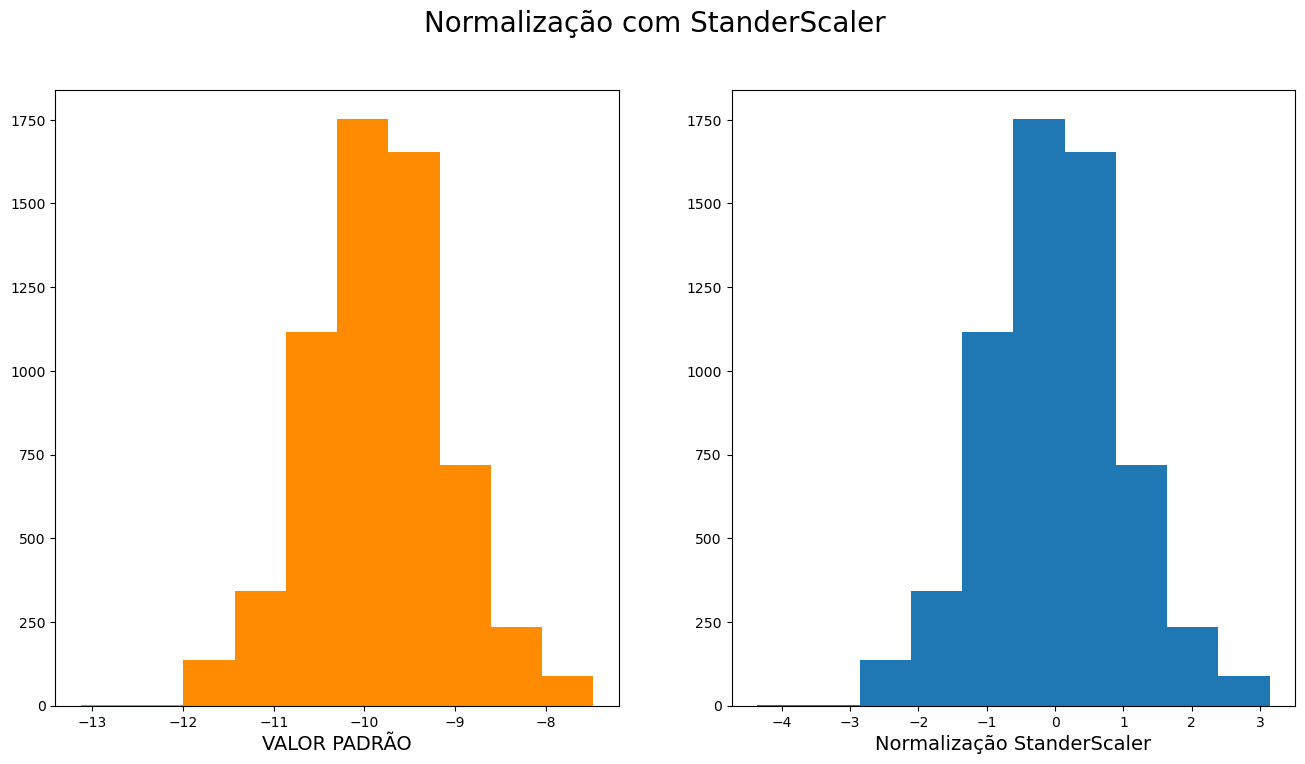

In [13]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('nyse_df.csv')

scaler = StandardScaler()
df['log_volatility_stand'] = scaler.fit_transform(df[['log_volatility']])

carregaDataset.plot_histograma('Normalização com StanderScaler', 'Normalização StanderScaler', df)

In [11]:
df = pd.read_csv('nyse_df.csv')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df.log_volatility
df['log_volatility'] = scaler.fit_transform(df[['log_volatility']])

modelo = Sequential()

x_train, y_train, x_test, y_test = carregaDataset.nysedf(df, 5)

modelo.fit(x_train, y_train, batch_size=20, epochs=100, verbose=1)
#modelo.fit(x_train, y_train, batch_size=40, epochs=400, verbose=1, callbacks=[checkpoint , reducePL])

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.1480 - mean_squared_error: 0.1480
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0240 - mean_squared_error: 0.0240
E

214/214 [==============================] - 0s 1ms/step - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 75/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 76/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 77/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 78/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 79/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 80/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 81/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 82/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch

134/134 [==============================] - 0s 859us/step
R² Test =  0.4092541447120558
R² Train=  0.5743369646309737


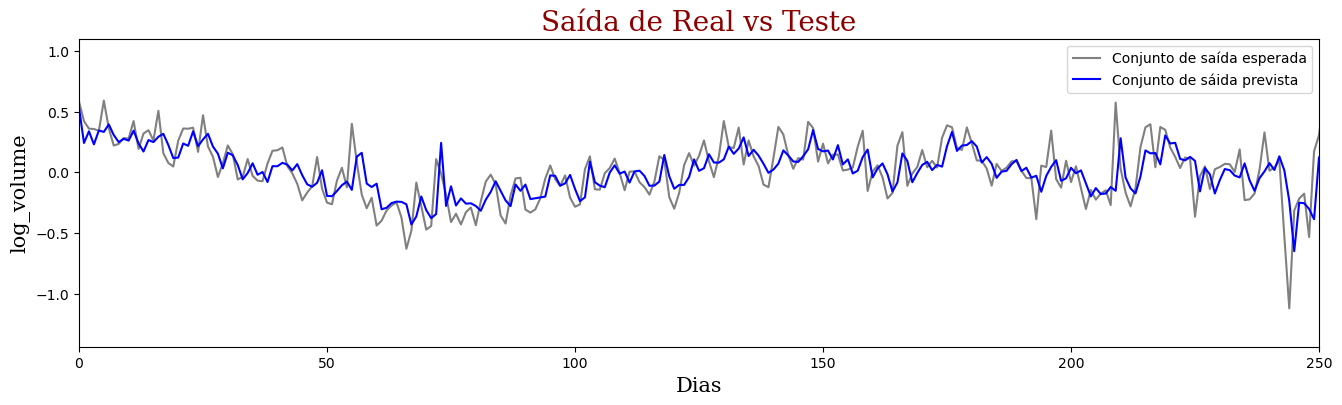

,Vt-5,Vt-4,Vt-3,Vt-2,Vt-1,Rt-5,Rt-4,Rt-3,Rt-2,Rt-1,Zt-5,Zt-4,Zt-3,Zt-2,Zt-1
0,0.044187,0.210182,0.525306,0.346202,0.032573,0.000568,-0.003462,0.003845,0.007813,-0.004461,-2.500970,-2.366521,-2.418037,-2.529058,-4.357078
1,0.133246,0.044187,0.210182,0.525306,0.346202,-0.010824,0.000568,-0.003462,0.003845,0.007813,-1.366028,-2.500970,-2.366521,-2.418037,-2.529058
2,-0.011528,0.133246,0.044187,0.210182,0.525306,0.000124,-0.010824,0.000568,-0.003462,0.003845,-1.505667,-1.366028,-2.500970,-2.366521,-2.418037
3,0.001607,-0.011528,0.133246,0.044187,0.210182,0.003358,0.000124,-0.010824,0.000568,-0.003462,-1.551515,-1.505667,-1.366028,-2.500970,-2.366521
4,-0.106437,0.001607,-0.011528,0.133246,0.044187,-0.003296,0.003358,0.000124,-0.010824,0.000568,-1.597607,-1.551515,-1.505667,-1.366028,-2.500970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,-0.001507,0.108579,0.144112,0.183537,0.199621,-0.005267,0.005267,0.000310,-0.007093,0.002216,-0.580364,-0.552451,-0.522110,-0.382707,-0.422152
4272,-0.631830,-0.001507,0.108579,0.144112,0.183537,0.000298,-0.005267,0.005267,0.000310,-0.007093,-0.719741,-0.580364,-0.552451,-0.522110,-0.382707
4273,-0.365829,-0.631830,-0.001507,0.108579,0.144112,-0.001216,0.000298,-0.005267,0.005267,0.000310,-0.852459,-0.719741,-0.580364,-0.552451,-0.522110
4274,-0.137014,-0.365829,-0.631830,-0.001507,0.108579,0.002336,-0.001216,0.000298,-0.005267,0.005267,-0.963748,-0.852459,-0.719741,-0.580364,-0.552451


In [12]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final['Standardization'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)
x_train

# Outro mode de normalização de dados da log_volatility, exemplo do histograma de sem normalização (cor laranja) e normalizado (cor azul), padrão para média no ponto zero.

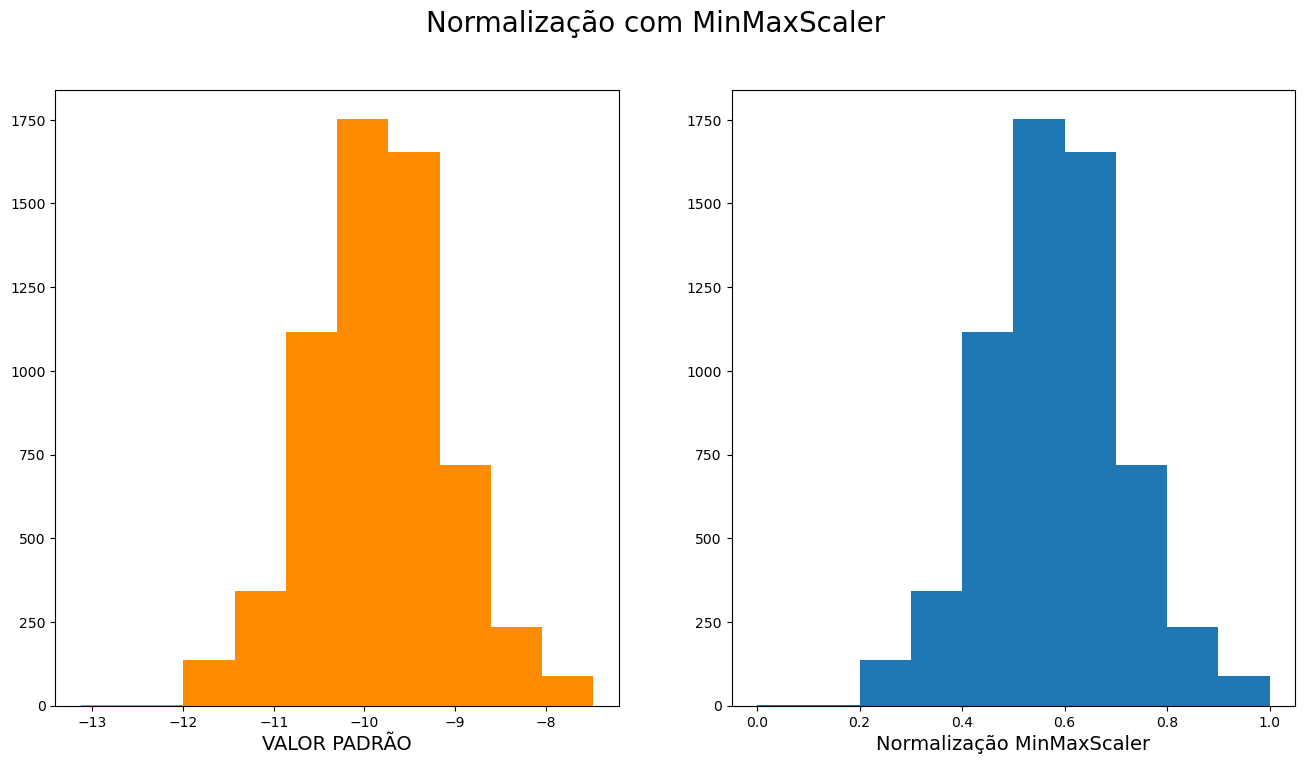

In [13]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('nyse_df.csv')

scaler = MinMaxScaler()
df['log_volatility_stand'] = scaler.fit_transform(df[['log_volatility']])

carregaDataset.plot_histograma("Normalização com MinMaxScaler", "Normalização MinMaxScaler", df)

In [14]:
df = pd.read_csv('nyse_df.csv')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['log_volatility'] = scaler.fit_transform(df[['log_volatility']])

modelo = Sequential()

x_train, y_train, x_test, y_test = carregaDataset.nysedf(df, 5)

modelo.fit(x_train, y_train, batch_size=20, epochs=100, verbose=1)
#modelo.fit(x_train, y_train, batch_size=40, epochs=400, verbose=1, callbacks=[checkpoint , reducePL])

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.0548 - mean_squared_error: 0.0548
Epoch 2/100
214/214 [==============================] - 0s 2ms/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 3/100
214/214 [==============================] - 0s 2ms/step - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0243 - mean_squared_error: 0.0243
E

214/214 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 75/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 76/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 77/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 78/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 79/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 80/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 81/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 82/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch

134/134 [==============================] - 0s 796us/step
R² Test =  0.4081063273910741
R² Train=  0.5659651416999295


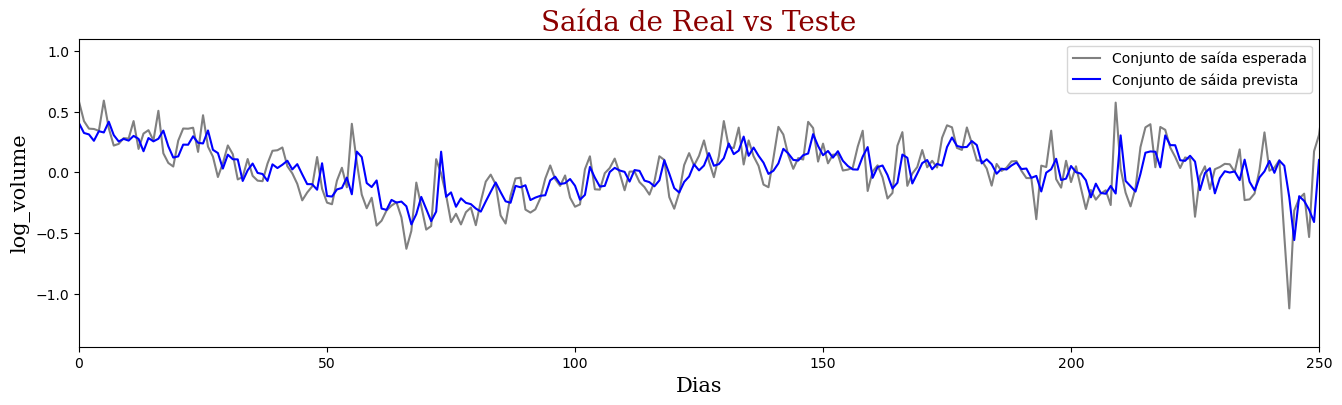

,Vt-5,Vt-4,Vt-3,Vt-2,Vt-1,Rt-5,Rt-4,Rt-3,Rt-2,Rt-1,Zt-5,Zt-4,Zt-3,Zt-2,Zt-1
0,0.044187,0.210182,0.525306,0.346202,0.032573,0.000568,-0.003462,0.003845,0.007813,-0.004461,0.247678,0.265618,0.258744,0.243930,0.000000
1,0.133246,0.044187,0.210182,0.525306,0.346202,-0.010824,0.000568,-0.003462,0.003845,0.007813,0.399124,0.247678,0.265618,0.258744,0.243930
2,-0.011528,0.133246,0.044187,0.210182,0.525306,0.000124,-0.010824,0.000568,-0.003462,0.003845,0.380490,0.399124,0.247678,0.265618,0.258744
3,0.001607,-0.011528,0.133246,0.044187,0.210182,0.003358,0.000124,-0.010824,0.000568,-0.003462,0.374372,0.380490,0.399124,0.247678,0.265618
4,-0.106437,0.001607,-0.011528,0.133246,0.044187,-0.003296,0.003358,0.000124,-0.010824,0.000568,0.368222,0.374372,0.380490,0.399124,0.247678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,-0.001507,0.108579,0.144112,0.183537,0.199621,-0.005267,0.005267,0.000310,-0.007093,0.002216,0.503962,0.507687,0.511735,0.530337,0.525074
4272,-0.631830,-0.001507,0.108579,0.144112,0.183537,0.000298,-0.005267,0.005267,0.000310,-0.007093,0.485364,0.503962,0.507687,0.511735,0.530337
4273,-0.365829,-0.631830,-0.001507,0.108579,0.144112,-0.001216,0.000298,-0.005267,0.005267,0.000310,0.467654,0.485364,0.503962,0.507687,0.511735
4274,-0.137014,-0.365829,-0.631830,-0.001507,0.108579,0.002336,-0.001216,0.000298,-0.005267,0.005267,0.452804,0.467654,0.485364,0.503962,0.507687


In [15]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final['MinMaxScaler'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)
x_train

# Acrescentando uma coluna para os dias da semana.
#Dias Aleatórios, 1 segunda, 2, terça, ..., 5 sexta

In [16]:
modelo = Sequential()

x_train, y_train, x_test, y_test = carregaDataset.dia_sequencia(5)

modelo.fit(x_train, y_train, batch_size=20, epochs=100, verbose=1)
#modelo.fit(x_train, y_train, batch_size=40, epochs=400, verbose=1, callbacks=[checkpoint , reducePL])

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.2227 - mean_squared_error: 0.2227
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0243 - mean_squared_error: 0.0243
E

214/214 [==============================] - 0s 1ms/step - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 75/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 76/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 77/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 78/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 79/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 80/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 81/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 82/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch

134/134 [==============================] - 0s 809us/step
R² Test =  0.4433488752670379
R² Train=  0.5972375084141


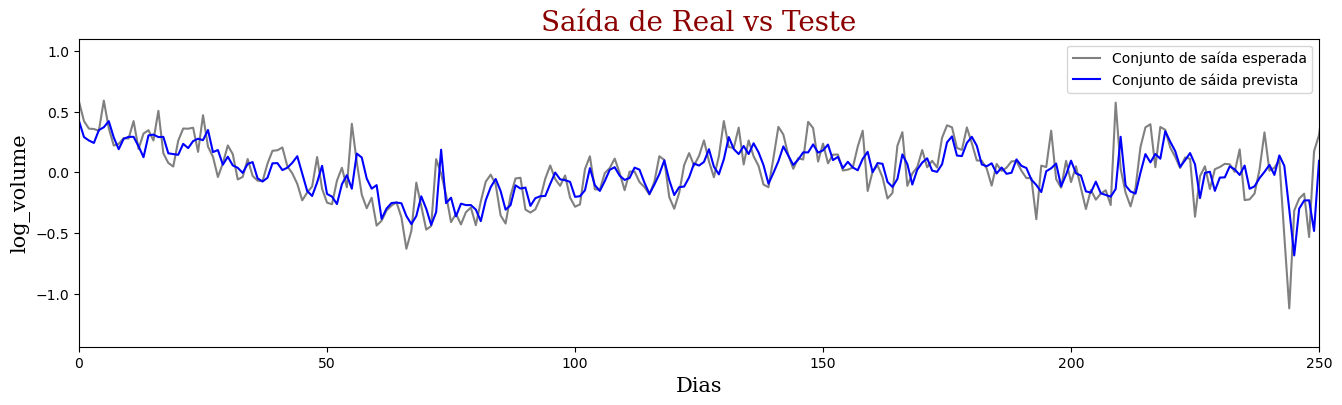

In [17]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final['Dias da Semana'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)

# Utilizando o método ***dia_get_dummies*** para atualização dos dados da coluna de variáveis categoricas day of week

In [18]:
modelo = Sequential()

x_train, y_train, x_test, y_test = carregaDataset.dia_sequencia(5)
x_train = carregaDataset.dia_get_dummies(x_train)
x_test = carregaDataset.dia_get_dummies(x_test)

modelo.fit(x_train, y_train, batch_size=20, epochs=100, verbose=1)
#modelo.fit(x_train, y_train, batch_size=40, epochs=400, verbose=1, callbacks=[checkpoint , reducePL])

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.2547 - mean_squared_error: 0.2547
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0250 - mean_squared_error: 0.0250
E

214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 75/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 76/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 77/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 78/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 79/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 80/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 81/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 82/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch

134/134 [==============================] - 0s 824us/step
R² Test =  0.4518281858547586
R² Train=  0.5987083698382571


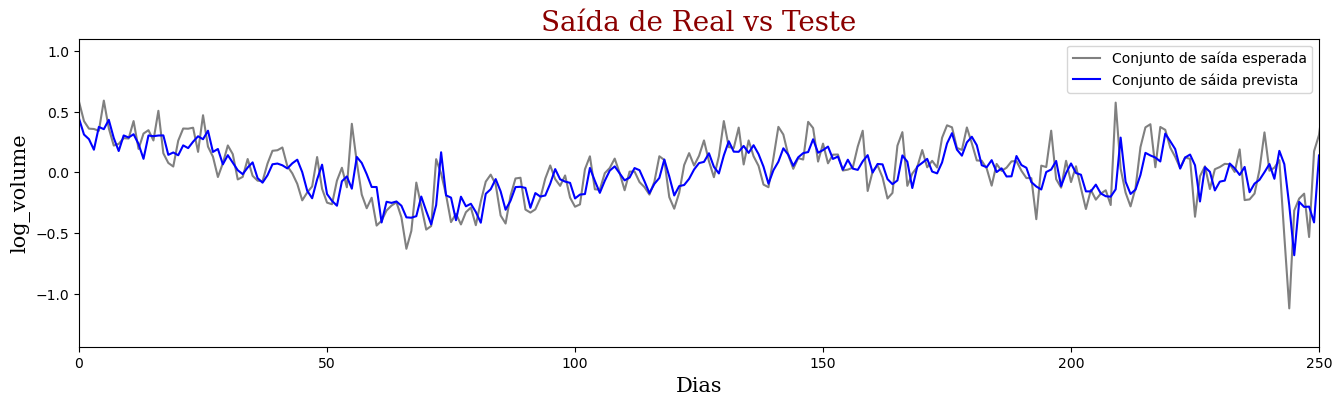

,Vt-5,Vt-4,Vt-3,Vt-2,Vt-1,Rt-5,Rt-4,Rt-3,Rt-2,Rt-1,Zt-5,Zt-4,Zt-3,Zt-2,Zt-1,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5
0,0.044187,0.210182,0.525306,0.346202,0.032573,0.000568,-0.003462,0.003845,0.007813,-0.004461,-11.728130,-11.626772,-11.665609,-11.749305,-13.127403,1,0,0,0,0
1,0.133246,0.044187,0.210182,0.525306,0.346202,-0.010824,0.000568,-0.003462,0.003845,0.007813,-10.872526,-11.728130,-11.626772,-11.665609,-11.749305,0,1,0,0,0
2,-0.011528,0.133246,0.044187,0.210182,0.525306,0.000124,-0.010824,0.000568,-0.003462,0.003845,-10.977797,-10.872526,-11.728130,-11.626772,-11.665609,0,0,1,0,0
3,0.001607,-0.011528,0.133246,0.044187,0.210182,0.003358,0.000124,-0.010824,0.000568,-0.003462,-11.012360,-10.977797,-10.872526,-11.728130,-11.626772,0,0,0,1,0
4,-0.106437,0.001607,-0.011528,0.133246,0.044187,-0.003296,0.003358,0.000124,-0.010824,0.000568,-11.047108,-11.012360,-10.977797,-10.872526,-11.728130,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,-0.001507,0.108579,0.144112,0.183537,0.199621,-0.005267,0.005267,0.000310,-0.007093,0.002216,-10.280234,-10.259191,-10.236318,-10.131226,-10.160962,1,0,0,0,0
4272,-0.631830,-0.001507,0.108579,0.144112,0.183537,0.000298,-0.005267,0.005267,0.000310,-0.007093,-10.385307,-10.280234,-10.259191,-10.236318,-10.131226,0,0,1,0,0
4273,-0.365829,-0.631830,-0.001507,0.108579,0.144112,-0.001216,0.000298,-0.005267,0.005267,0.000310,-10.485360,-10.385307,-10.280234,-10.259191,-10.236318,0,0,0,1,0
4274,-0.137014,-0.365829,-0.631830,-0.001507,0.108579,0.002336,-0.001216,0.000298,-0.005267,0.005267,-10.569258,-10.485360,-10.385307,-10.280234,-10.259191,0,0,0,0,1


In [19]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final['Dias - get_dummies'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)
x_train

# Utilizando o método ***dia_seno_cosseno*** para atualização dos dados da coluna de variáveis categoricas day of week

In [20]:
modelo = Sequential()

x_train, y_train, x_test, y_test = carregaDataset.dia_sequencia(5)
x_train = carregaDataset.dia_seno_cosseno(x_train)
x_test = carregaDataset.dia_seno_cosseno(x_test)

modelo.fit(x_train, y_train, batch_size=20, epochs=100, verbose=1)
#modelo.fit(x_train, y_train, batch_size=40, epochs=400, verbose=1, callbacks=[checkpoint , reducePL])

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0235 - mean_squared_error: 0.0235
E

214/214 [==============================] - 0s 1ms/step - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 75/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 76/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 77/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 78/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 79/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 80/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 81/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 82/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch

134/134 [==============================] - 0s 793us/step
R² Test =  0.4495092393273701
R² Train=  0.5990692446820027


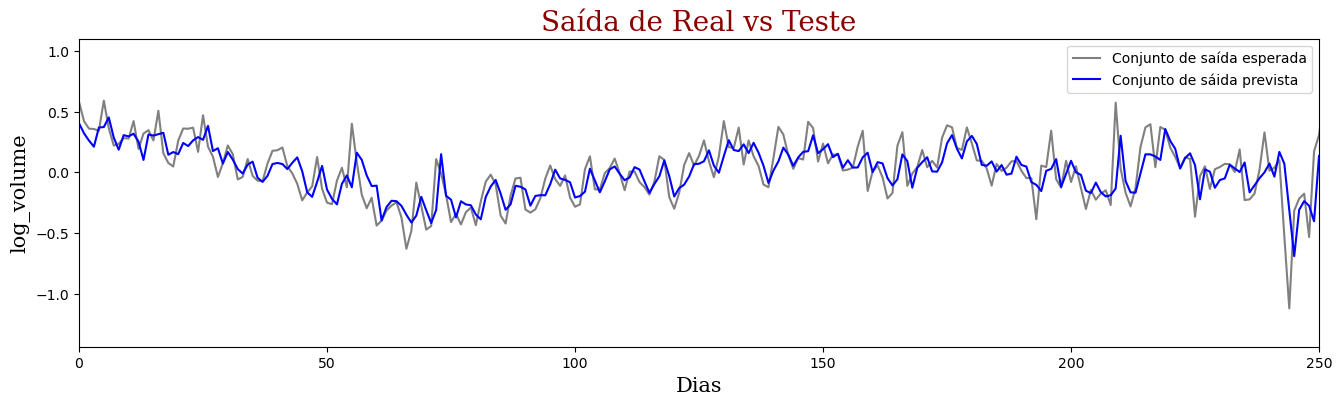

,Vt-5,Vt-4,Vt-3,Vt-2,Vt-1,Rt-5,Rt-4,Rt-3,Rt-2,Rt-1,Zt-5,Zt-4,Zt-3,Zt-2,Zt-1,cosseno,seno
0,0.044187,0.210182,0.525306,0.346202,0.032573,0.000568,-0.003462,0.003845,0.007813,-0.004461,-11.728130,-11.626772,-11.665609,-11.749305,-13.127403,0.309,0.951
1,0.133246,0.044187,0.210182,0.525306,0.346202,-0.010824,0.000568,-0.003462,0.003845,0.007813,-10.872526,-11.728130,-11.626772,-11.665609,-11.749305,-0.809,0.588
2,-0.011528,0.133246,0.044187,0.210182,0.525306,0.000124,-0.010824,0.000568,-0.003462,0.003845,-10.977797,-10.872526,-11.728130,-11.626772,-11.665609,-0.809,-0.588
3,0.001607,-0.011528,0.133246,0.044187,0.210182,0.003358,0.000124,-0.010824,0.000568,-0.003462,-11.012360,-10.977797,-10.872526,-11.728130,-11.626772,0.309,-0.951
4,-0.106437,0.001607,-0.011528,0.133246,0.044187,-0.003296,0.003358,0.000124,-0.010824,0.000568,-11.047108,-11.012360,-10.977797,-10.872526,-11.728130,1.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,-0.001507,0.108579,0.144112,0.183537,0.199621,-0.005267,0.005267,0.000310,-0.007093,0.002216,-10.280234,-10.259191,-10.236318,-10.131226,-10.160962,0.309,0.951
4272,-0.631830,-0.001507,0.108579,0.144112,0.183537,0.000298,-0.005267,0.005267,0.000310,-0.007093,-10.385307,-10.280234,-10.259191,-10.236318,-10.131226,-0.809,-0.588
4273,-0.365829,-0.631830,-0.001507,0.108579,0.144112,-0.001216,0.000298,-0.005267,0.005267,0.000310,-10.485360,-10.385307,-10.280234,-10.259191,-10.236318,0.309,-0.951
4274,-0.137014,-0.365829,-0.631830,-0.001507,0.108579,0.002336,-0.001216,0.000298,-0.005267,0.005267,-10.569258,-10.485360,-10.385307,-10.280234,-10.259191,1.000,-0.000


In [21]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final['Dias - Sen_Cos'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)
x_train

In [22]:
df_Final.rename(index={0:"R²"})

,Beta=0.85,Beta=0.90,Beta=0.95,Standardization,MinMaxScaler,Dias da Semana,Dias - get_dummies,Dias - Sen_Cos
R²,0.409446,0.410072,0.406011,0.409254,0.408106,0.443349,0.451828,0.449509
